# Github Languages Data Visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
issues_df = pd.read_csv('/kaggle/input/github-programming-languages-data/issues.csv')
prs_df = pd.read_csv('/kaggle/input/github-programming-languages-data/prs.csv')
repos_df = pd.read_csv('/kaggle/input/github-programming-languages-data/repos.csv')

## Data Exporaltion

In [3]:
issues_df.head(5)

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [4]:
issues_df.describe()

,year,quarter,count
count,3375.000000,3375.000000,3375.000000
mean,2016.833481,2.510222,9210.374815
std,2.574464,1.119345,28680.099075
min,2011.000000,1.000000,100.000000
25%,2015.000000,2.000000,222.500000
50%,2017.000000,3.000000,567.000000
75%,2019.000000,4.000000,2989.500000
max,2022.000000,4.000000,341480.000000


In [5]:
prs_df.head(5)

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [6]:
prs_df.describe()

,year,quarter,count
count,3462.000000,3462.000000,3462.000000
mean,2017.013576,2.502022,11131.740901
std,2.552447,1.122835,34686.780996
min,2011.000000,1.000000,100.000000
25%,2015.000000,1.000000,230.000000
50%,2017.000000,2.000000,616.500000
75%,2019.000000,4.000000,3380.500000
max,2022.000000,4.000000,397530.000000


In [7]:
repos_df.head(5)

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


In [8]:
repos_df.describe()

,num_repos
count,4.530000e+02
mean,1.724180e+04
std,9.147605e+04
min,1.000000e+00
25%,3.700000e+01
50%,2.640000e+02
75%,2.563000e+03
max,1.100421e+06


In [9]:
repos_df[repos_df['language'] == "Jupyter Notebook"]

,language,num_repos
41,Jupyter Notebook,16898


## Data Visualizations

<AxesSubplot:xlabel='language'>

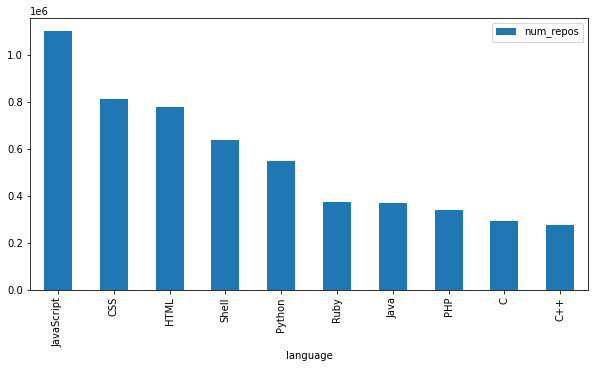

In [10]:
top_10_repos = repos_df.sort_values(by='num_repos', ascending=False)[:10]
top_10_repos.plot(kind='bar', x='language', figsize=(10, 5))

### PRs Over a Year

In [11]:
def create_prs_line_charts(year):
    prs = prs_df[(prs_df['year'] == year) & (prs_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)
    plt = prs.plot.line(legend=True, title=f'{year} Language PRs', figsize=(20,20), xticks=[1,2,3,4])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

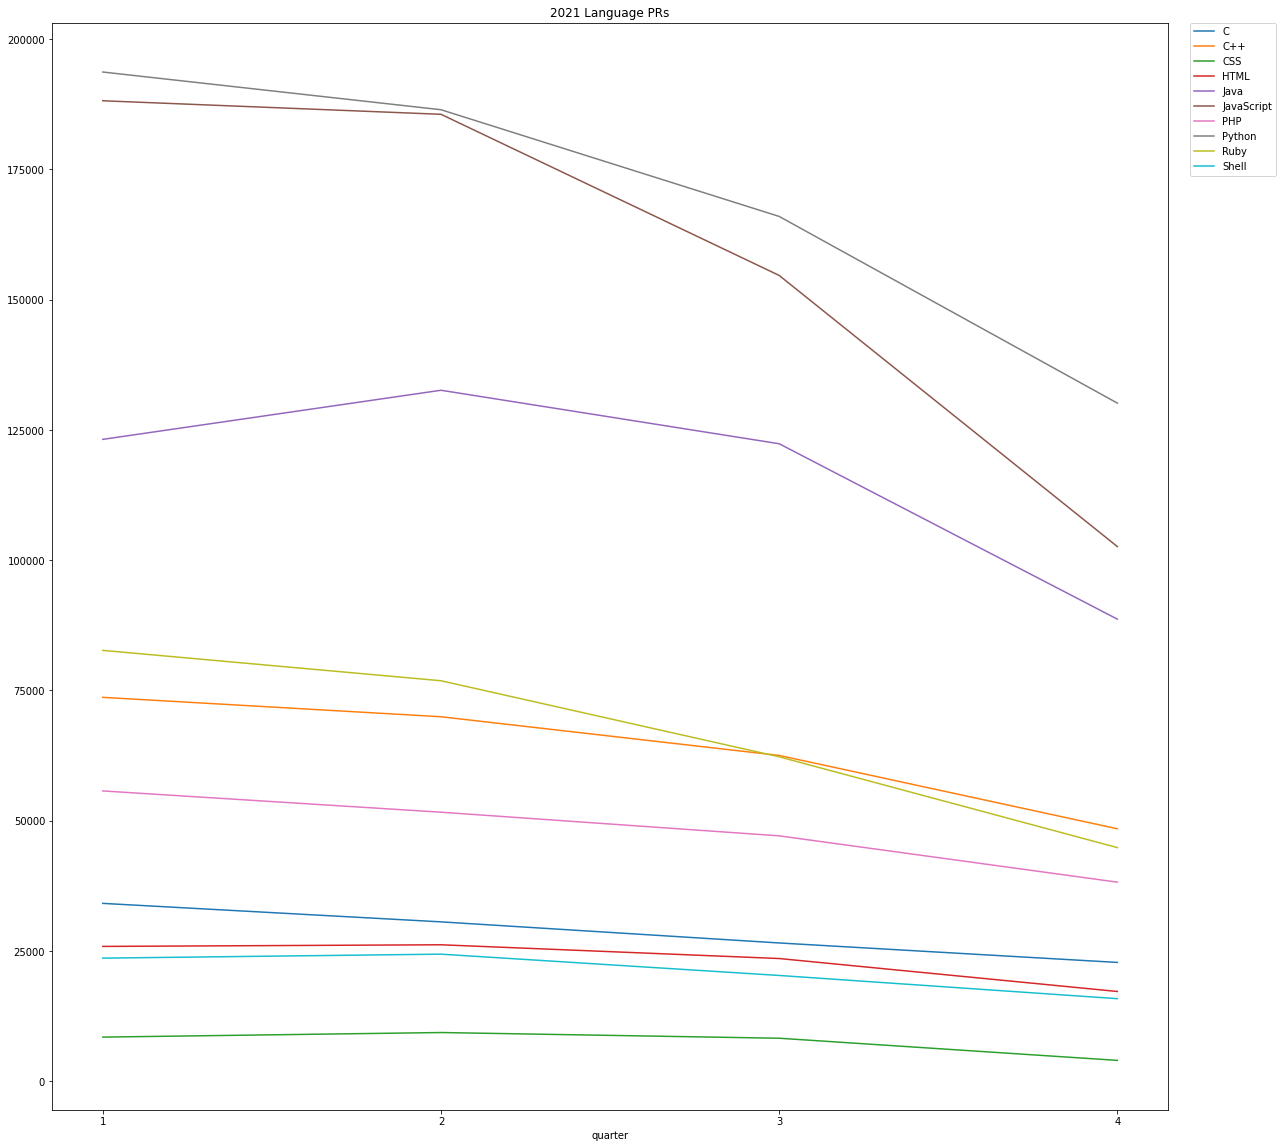

In [12]:
create_prs_line_charts(2021)

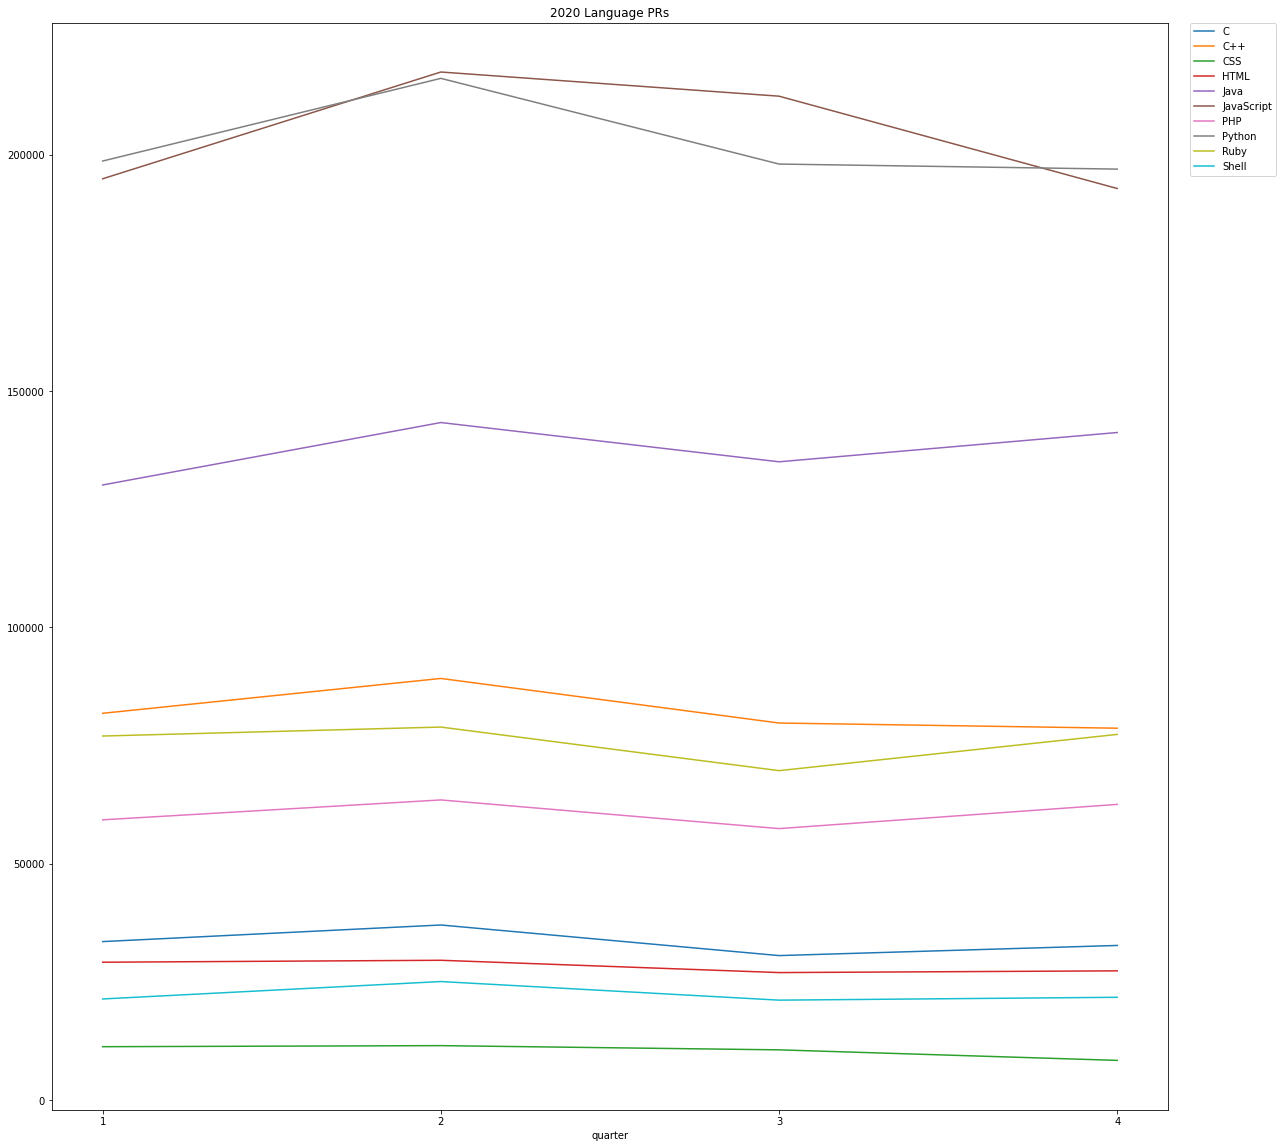

In [13]:
create_prs_line_charts(2020)

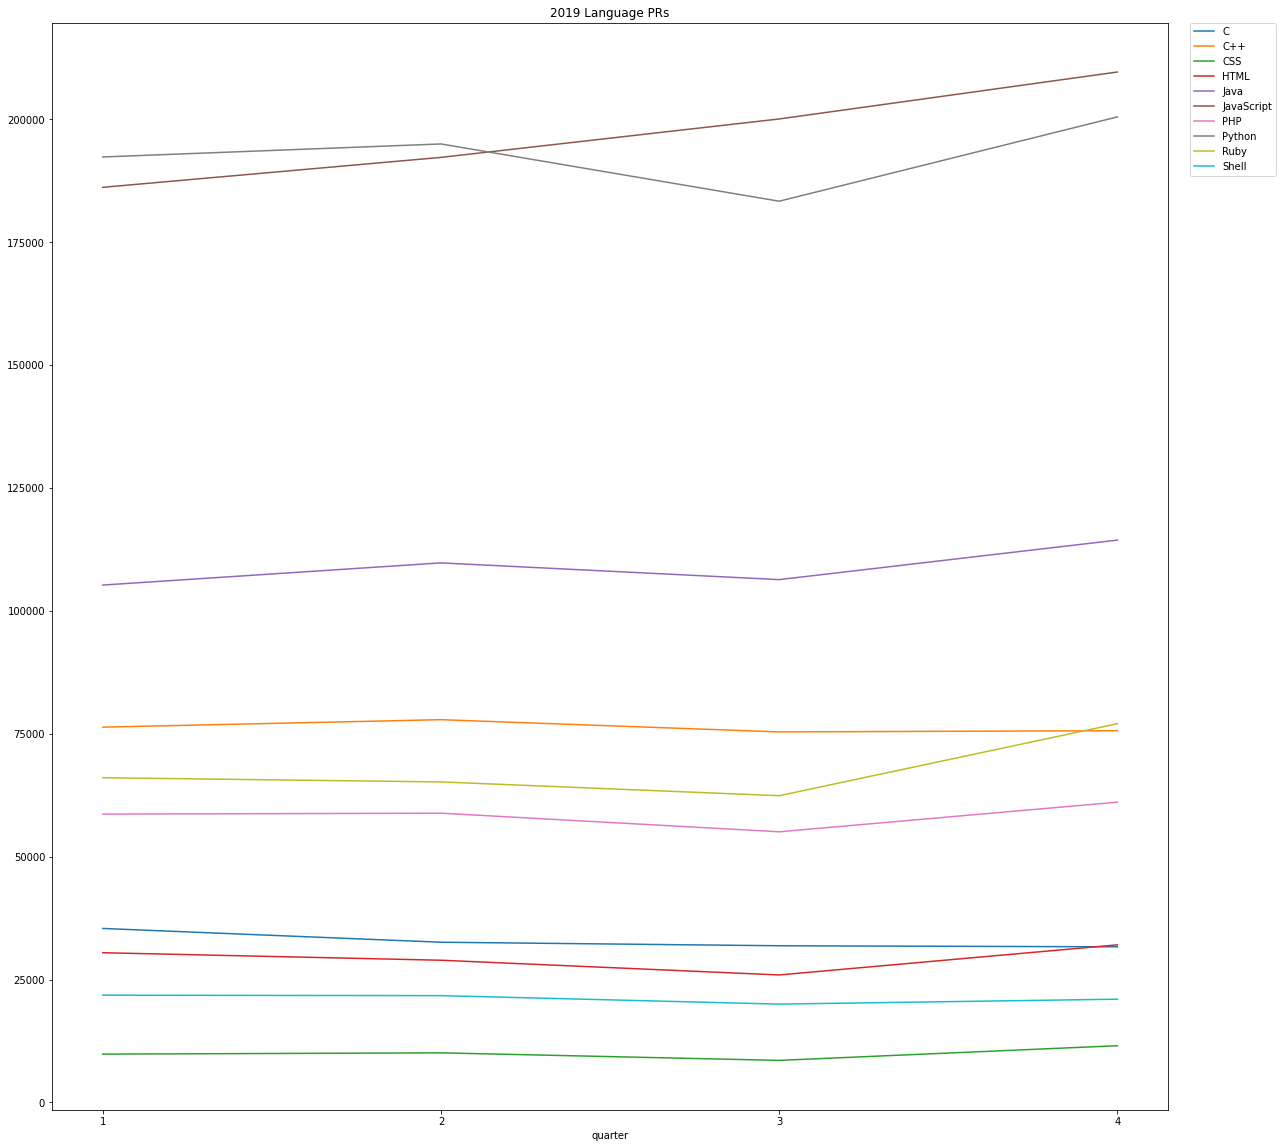

In [14]:
create_prs_line_charts(2019)

These above charts show an interesting trend in language usage over the years. I decided to just display the top 10 languages that are used in repositories because displaying more than that made the charts unreadable and each language seemed to have a very similar distribution. I wonder what caused the uptick in usage in the 4th quarter of 2020.

### Issues Over a Year

In [15]:
def create_issue_line_charts(year):
    issues = issues_df[(issues_df['year'] == year) & (issues_df['name'].isin(top_10_repos['language']))].sort_values(by='count', ascending=False).pivot(columns='name', index='quarter', values='count').dropna(axis=1)
    plt = issues.plot.line(legend=True, title=f'{year} Language Issues', figsize=(20,20), xticks=[1,2,3,4])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

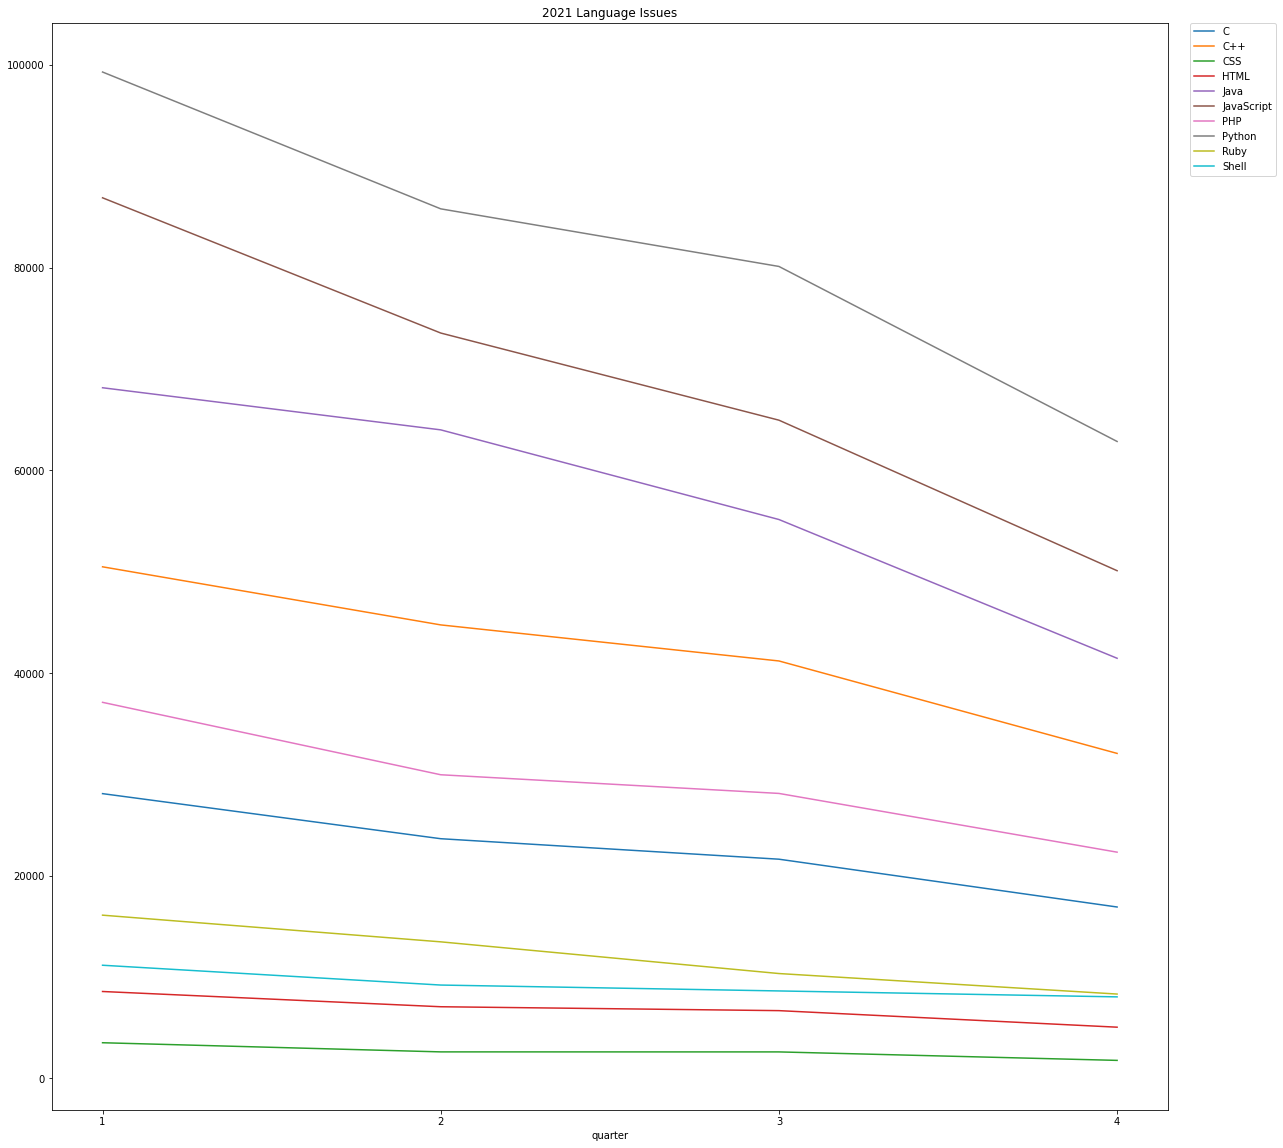

In [16]:
create_issue_line_charts(2021)

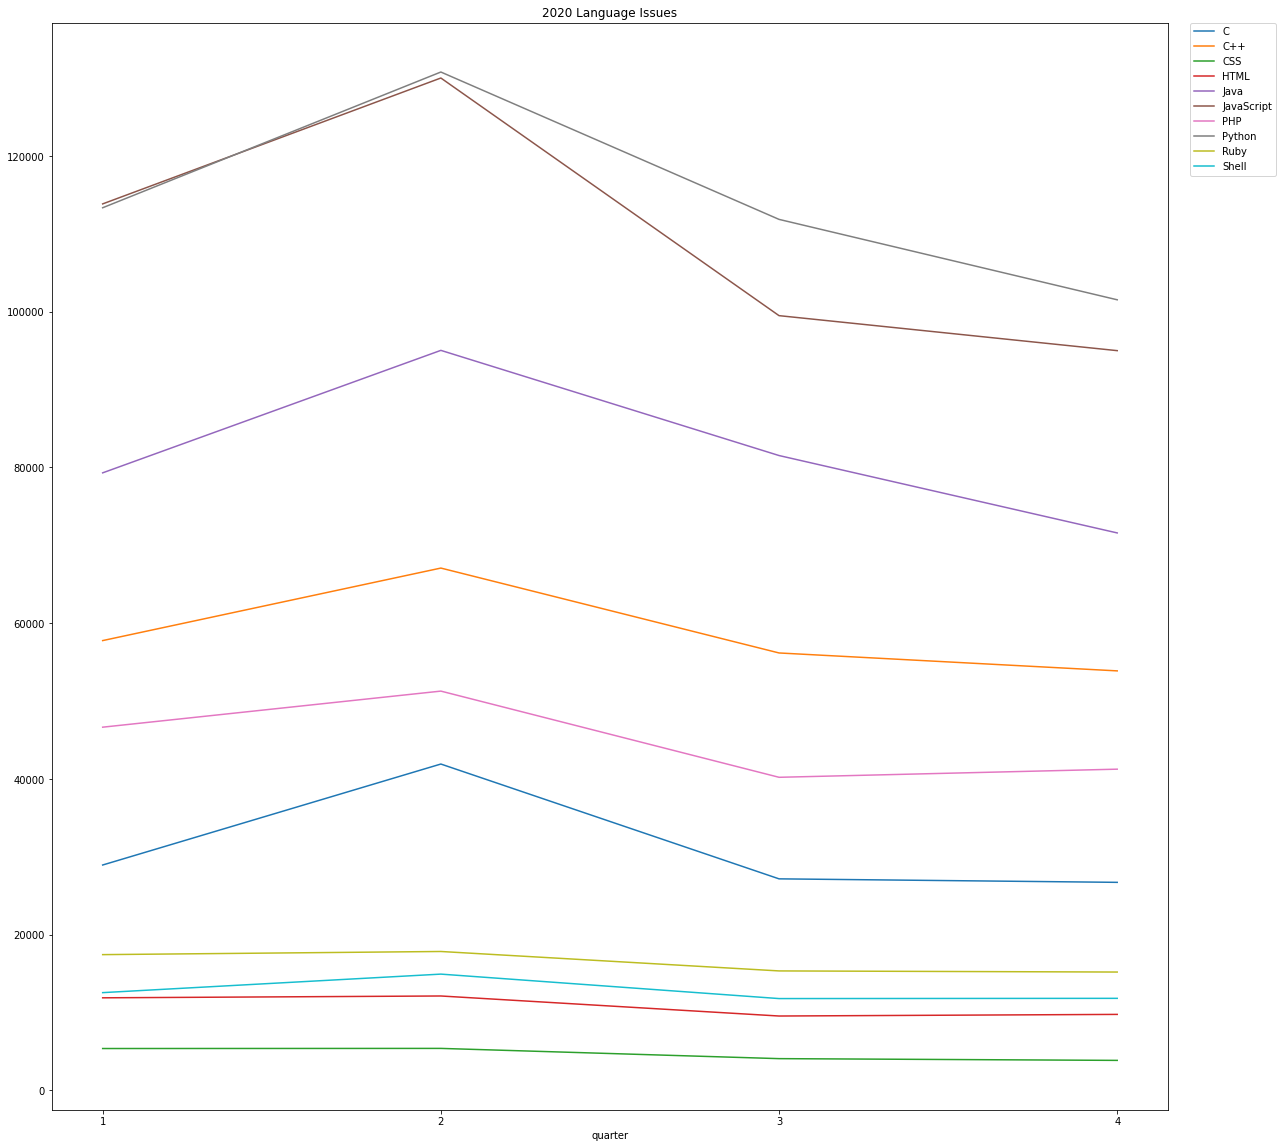

In [17]:
create_issue_line_charts(2020)

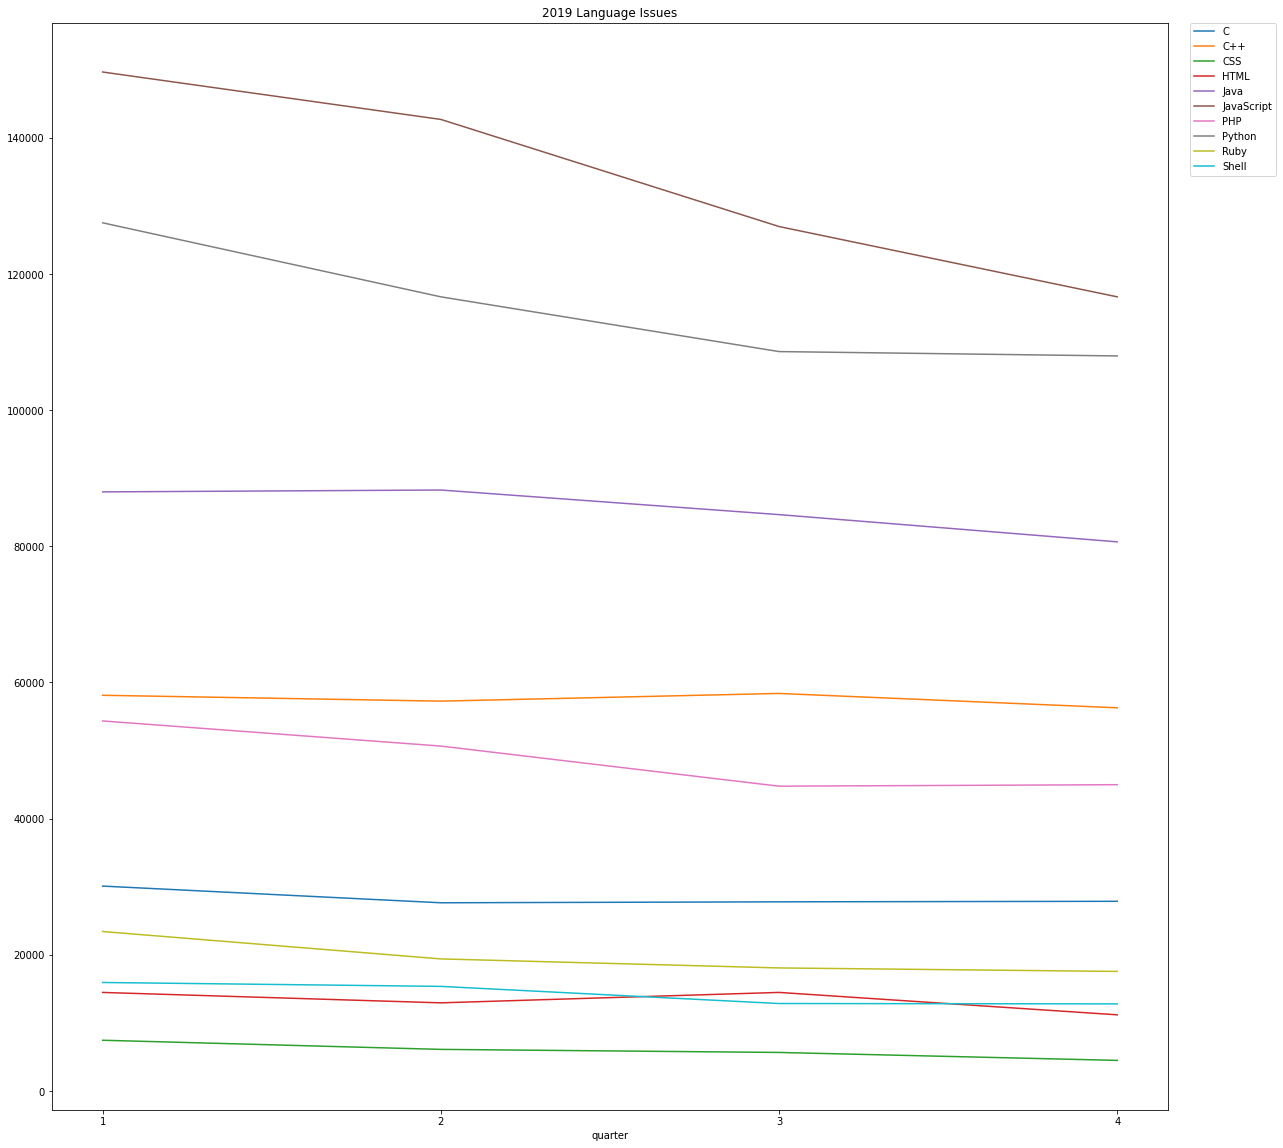

In [18]:
create_issue_line_charts(2019)

It's really intersting we don't see a similar trend between the PRs and Issues in quarter 4. 

### Comparing PRs vs Issues

In [19]:
import matplotlib.pyplot as pl

In [20]:
def create_line_plot(year, name):
    issues = issues_df[(issues_df['year'] == year) & (issues_df['name'] == name)].replace(to_replace=name, value=f'{name} Issues')
    prs = prs_df[(prs_df['year'] == year) & (prs_df['name'] == name)].replace(to_replace=name, value=f'{name} PRs')
    df = prs.append(issues).pivot(columns='name', index='quarter', values='count').dropna(axis=1)
    return df.plot.line(legend=True, title=f'{year} {name} PRs vs Issues Per Quarter', xticks=[1,2,3,4])

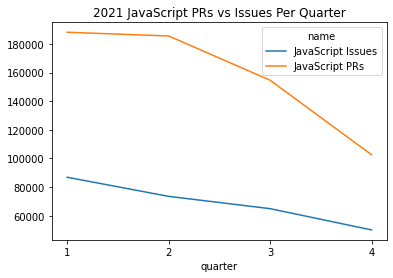

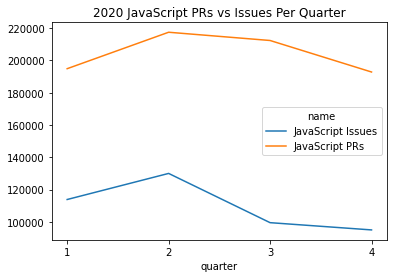

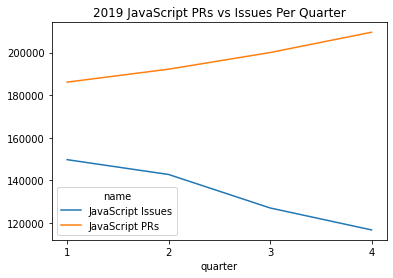

In [21]:
plt_2021 = create_line_plot(2021, 'JavaScript')
plt_2020 = create_line_plot(2020, 'JavaScript')
plt_2019 = create_line_plot(2019, 'JavaScript')

<AxesSubplot:title={'center':'2019 Python PRs vs Issues Per Quarter'}, xlabel='quarter'>

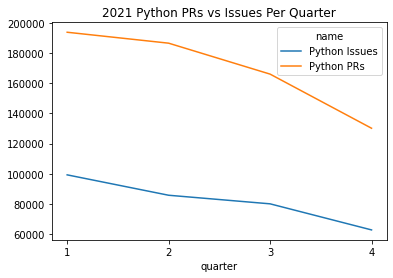

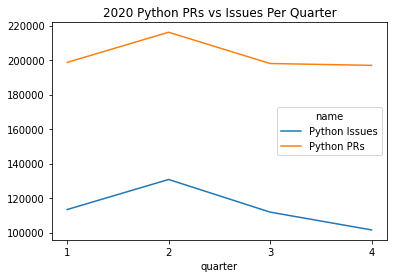

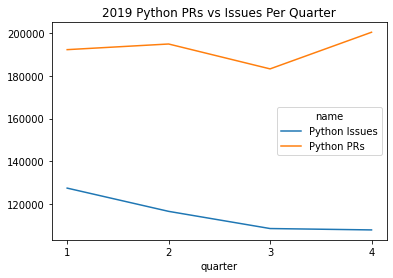

In [22]:
create_line_plot(2021, 'Python')
create_line_plot(2020, 'Python')
create_line_plot(2019, 'Python')

<AxesSubplot:title={'center':'2019 CSS PRs vs Issues Per Quarter'}, xlabel='quarter'>

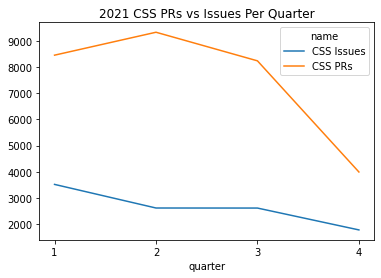

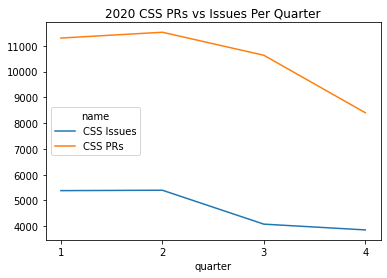

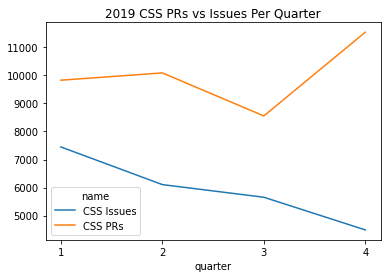

In [23]:
create_line_plot(2021, 'CSS')
create_line_plot(2020, 'CSS')
create_line_plot(2019, 'CSS')

Looking at these charts, I really want to see if I can draw any better conclusions about what happened in quarter 4 of 2018 where the count of PRs went up and Issues went down. I also think it's interesting that there seems to only be a small correlation between the two lines, and intuitively, at least for me, it would've made more sense for there to be more issues and fewer PRs rather than the other way around.

### Comparing Total Issues and PRs per Year Regardless of Language

In [24]:
pr_sums = prs_df.drop(columns='quarter').groupby('year').sum()
issue_sums = issues_df.drop(columns='quarter').groupby('year').sum()
combined_sums = pr_sums.merge(right=issue_sums, on='year')

<AxesSubplot:xlabel='year'>

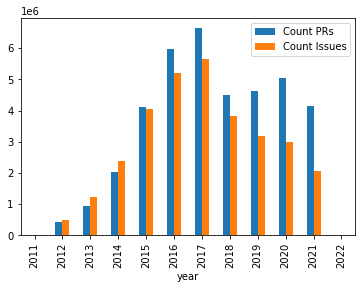

In [25]:
combined_sums.rename(columns={'count_x': 'Count PRs', 'count_y': 'Count Issues'}, inplace=True)
combined_sums.plot.bar()

Interesting that there were more Issues than PR's until 2015 where PR's start increasing much faster than the Issue count.